### <img style="float: left; padding-right: 10px; width: 45px" src="https://media-exp1.licdn.com/dms/image/C4E0BAQHCtAMn01UMGQ/company-logo_200_200/0/1621354097823?e=2159024400&v=beta&t=Ck_6OuaeMn7U7rcENlR9TrLRq_Nn8-Y50sKc06he6l4">Cientista de Dados | Pleno/Sênior
#### Desafio Técnico

##### Cenário:

“Você provavelmente já recebeu uma ligação de telemarketing oferecendo um produto que você não precisa. Essa situação de estresse é minimizada quando você oferece um produto que o cliente realmente precisa.”

Obs.: y é a flag de cliente interessado no produto.

**Candidata:** Flávia Monteiro <br>

In [88]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import classification_report 
from sklearn import preprocessing

from statistics import mode, StatisticsError

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)
pd.set_option('display.notebook_repr_html', True)

from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

#### Carregando dataset
##### Inicio da análise exploratória dos dados.

In [89]:
dataset_bruto = pd.read_csv("data/train.csv")
dataset_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14123 entries, 0 to 14122
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14123 non-null  int64  
 1   var1    14123 non-null  int64  
 2   var2    14123 non-null  int64  
 3   var3    14123 non-null  int64  
 4   var4    14123 non-null  int64  
 5   var5    14123 non-null  int64  
 6   var6    14123 non-null  int64  
 7   var7    14123 non-null  int64  
 8   var8    14123 non-null  int64  
 9   var9    14123 non-null  int64  
 10  var10   14123 non-null  int64  
 11  var11   14123 non-null  int64  
 12  var12   14123 non-null  int64  
 13  var13   14123 non-null  int64  
 14  var14   14123 non-null  int64  
 15  var15   14123 non-null  int64  
 16  var16   14123 non-null  int64  
 17  var17   14123 non-null  int64  
 18  var18   14123 non-null  int64  
 19  var19   14123 non-null  int64  
 20  var20   14123 non-null  int64  
 21  var21   14123 non-null  int64  
 22

### Primeira observação da natureza do Dataset
`14 variaveis` são reais **(float)**, desde a **var55 á var 68**. <br>
`55 variaveis` são inteiras **(int)**, destes atributos **1** é referente ao **ID** (que presumo ser do usuário ou do código de atendimento, e as outras vão da **var1 á var54**.<br>
O atributo alvo `Y` foi identificado como do tipo de dado **inteiro** também, porém, ele pode assumir apenas dois valores: <br>
- `0 - desinteresse do cliente`
- `1 - interesse do cliente`

Carregando os `metadados` do dataset é possível ter conhecimento do tipo (natureza) de cada variável, o que nos permite ter uma primeira ideia de sua função e comportamento. 

In [90]:
metadados = pd.read_csv("data/metadata.csv")
metadados

,Variavel cod,Variavel tipo
0,id,Qualitativo nominal
1,var1,Qualitativo nominal
2,var2,Qualitativo nominal
3,var3,Qualitativo nominal
4,var4,Qualitativo nominal
5,var5,Qualitativo nominal
6,var6,Qualitativo nominal
7,var7,Qualitativo nominal
8,var8,Qualitativo nominal
9,var9,Qualitativo nominal


In [91]:
md = metadados.groupby("Variavel tipo").size()
md

Variavel tipo
Qualitativo nominal      36
Qualitativo ordinal       4
Quantitativo continua    12
Quantitativo discreto    18
dtype: int64

#### Verificando a relação de tipos de variáveis no Dataset
- 40 atributos podem ser considerados categoricos, mais que 50% dos campos;

In [92]:
metadados.sort_values(by="Variavel tipo")

,Variavel cod,Variavel tipo
0,id,Qualitativo nominal
20,var20,Qualitativo nominal
21,var21,Qualitativo nominal
22,var22,Qualitativo nominal
23,var23,Qualitativo nominal
28,var28,Qualitativo nominal
29,var29,Qualitativo nominal
30,var30,Qualitativo nominal
31,var31,Qualitativo nominal
33,var33,Qualitativo nominal


#### Visualizando o dataset bruto é possível ver facilmente valores `nulos` ou `corrompidos` em pelo menos 11 atributos.

In [93]:
dataset_bruto

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,35295,4,39,2511,28766,1109,2094,31,24,3,-999,5082,-999,1678,23,55,56,20,5,198,23,1739,5,4,2,1,7,0,26,5,1,0,17,5,12,314,0,1,0,4,2,3,23,5,1,0,0,0,0,0,0,0,25,2,2,0.227307,0.048,0.978495,0.063199,0.122448,-999.000000,0.069347,0.036178,0.869828,0.016160,-999.000000,-999.00000,0.455882,0.147059,0
14119,35296,19,129,1114,-999,6376,-999,-999,27,-999,-999,-999,-999,1387,13,-999,-999,-999,-999,719,13,1445,5,1,1,2,-999,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,-999,0,0,0.210104,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.000000,-999.00000,0.147059,0.198529,0
14120,35301,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0.217944,0.029,1.000000,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.000000,-999.00000,0.397059,0.158088,0
14121,35304,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.000000,-999.00000,0.264706,0.128676,0


#### Analisando medidas de estatística básica
- `ID`: Não há repetições de valores do campo, justifica eliminar a coluna
- `(-999)`: Avaliando a proporção de amostras (-999) em cada atributo, notou-se que as variaveis `var65 e var66` possuem mais de `86%` de amostras nessa condição. Provavelmente estas colunas também serão desconsideradas. As variáveis `var8,var59,var12,var7,var6,var11,var57,var56,var26,var58,var9,var52` irão necessitar de um estudo melhor para serem candidatas a `drop` pois estão na faixa de `>10%<=50% `. O atributo `var60` possui cerca de `46%` de valores nulos ou corrompidos, logo, provavelmente será cortada.

In [94]:
try:
    print(mode(dataset_bruto["id"]))
except StatisticsError:
    print("**Não há valores duplicados no campo ID.**")
    
dataset_bruto.describe()

**Não há valores duplicados no campo ID.**


,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
count,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000
mean,17474.649366,9.712667,23.966579,1584.671245,15179.176025,5543.697869,1315.314168,-109.713729,-138.426680,-106.362388,-118.986688,13342.299865,3430.081144,1355.395454,19.480988,-65.831056,-65.180415,-84.422856,-93.522835,1059.038590,19.793670,1394.820435,3.478581,2.532890,0.958649,2.093181,-106.185867,0.370035,19.237485,3.644127,1.386887,0.036395,13.714508,3.141967,26.603413,394.255045,14.331162,7.585640,1.867025,3.592509,6.010338,3.096651,24.737025,6.855059,0.865751,0.275225,0.221624,0.049848,0.106068,0.343695,0.148340,0.055300,-85.239114,1.635276,1.519224,0.216031,-111.822517,-112.092123,-111.022124,-154.157900,-458.540340,-24.210294,0.073086,0.779221,0.028778,-862.721979,-862.762111,-41.252803,-2.154825,0.201798
std,10249.066602,7.269559,218.429664,1118.101765,9994.295223,3329.493664,1210.074896,350.202420,371.128392,311.608454,392.409936,9849.807542,3079.899094,642.799261,7.511958,307.502580,307.691935,300.502638,297.389385,537.377623,7.590808,688.872118,1.813111,1.112159,0.915563,1.388681,315.879767,0.482831,8.278536,1.062332,0.556791,0.187276,4.953779,1.992664,18.793208,181.868748,12.484156,8.723957,4.066404,1.006279,4.783179,1.029761,3.432140,4.048218,0.340932,0.914687,0.803367,0.269135,0.487567,0.474957,0.355449,0.228573,319.246246,0.749654,0.714010,0.022642,315.671274,315.799354,314.158769,361.158606,497.945633,154.485314,0.053963,0.234068,0.018681,342.956927,342.855920,199.275514,48.244171,0.401357
min,1.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.004267,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,8550.500000,4.000000,38.000000,731.000000,6493.500000,2374.000000,482.000000,16.000000,10.000000,1.000000,14.000000,4525.500000,914.000000,811.000000,13.000000,2.000000,3.000000,3.000000,3.000000,586.000000,13.000000,796.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,15.000000,4.000000,1.000000,0.000000,10.000000,1.000000,10.000000,255.000000,2.000000,1.000000,0.000000,4.000000,2.000000,3.000000,23.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.00

#### Avaliando a matriz de correlação entre as variáveis

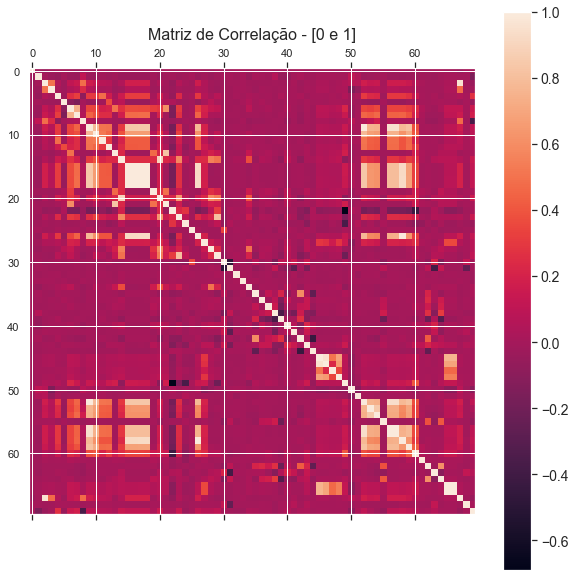

In [95]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10,10))

plt.matshow(dataset_bruto.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de Correlação - [0 e 1]', fontsize=16);
plt.show()

In [96]:
matrix = dataset_bruto.corr()

matrix_df = pd.DataFrame({'Pearson_y': matrix['y'][:-1]})
matrix_df.sort_values(by='Pearson_y', ascending= False)

,Pearson_y
var4,0.267697
var7,0.184582
var20,0.156912
var6,0.150978
var23,0.147892
var14,0.142568
var58,0.121215
var26,0.121092
var18,0.119264
var17,0.118962


In [97]:
matrix

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
id,1.000000,-0.018434,-0.032169,-0.004065,0.006869,-0.000622,-0.005410,-0.023912,0.003889,-0.005181,-0.003056,0.005097,-0.007618,0.013667,-0.004347,-0.003030,-0.002978,-0.003491,-0.003709,0.001593,-0.005115,0.021732,-0.002731,0.003877,-0.007084,0.008683,0.009957,-0.005840,-0.018651,0.008141,-0.012403,-0.003110,0.011361,0.009266,-0.006049,-0.001769,-0.005496,0.009835,-0.005938,-0.003753,-0.007492,0.000979,0.006294,-0.012816,-0.011301,-0.003131,-0.002156,-0.005566,-0.011512,0.005172,-0.001991,-0.007542,-0.005604,-0.009394,-0.015539,-0.002203,-0.005601,-0.005833,0.009939,-0.012827,0.002493,-0.006964,-0.003878,0.003944,0.006000,-0.003855,-0.003854,-0.029655,0.006603,-0.002099
var1,-0.018434,1.000000,0.000073,-0.034189,-0.051234,0.002662,-0.035333,-0.038974,0.111272,-0.027785,-0.029723,-0.014195,-0.025948,-0.010720,-0.036898,-0.038475,-0.038562,-0.038459,-0.038298,-0.012741,-0.039428,-0.009918,-0.004539,-0.024651,-0.011084,0.006293,-0.032907,-0.014635,-0.032812,-0.014021,0.005983,0.007734,-0.010212,0.008516,-0.047189,0.012493,0.003304,-0.011186,0.066855,-0.044921,-0.053054,-0.001578,0.020797,-0.003867,-0.011422,0.007900,0.005909,0.007249,0.001527,-0.002159,0.102957,0.056356,-0.026940,-0.020687,-0.006862,0.002586,-0.024431,-0.024549,-0.032787,-0.027400,-0.017277,-0.011731,-0.019876,-0.026899,-0.006132,0.006310,0.006312,-0.000119,-0.000909,-0.144723
var2,-0.032169,0.000073,1.000000,0.500884,0.050235,-0.018062,0.113457,0.154596,0.480245,0.174923,0.131737,0.077898,0.068059,-0.008729,0.050288,0.185515,0.185548,0.185990,0.186175,-0.006374,0.048022,-0.006189,-0.052511,0.056717,0.004108,-0.010945,0.171776,0.049892,-0.003784,-0.020348,-0.016663,-0.001478,-0.002673,0.013095,-0.006386,-0.015531,-0.003814,-0.007432,-0.002553,-0.005071,-0.002991,0.023171,-0.016177,0.009685,0.001340,0.033079,0.033325,0.009810,0.020434,0.047082,0.078012,0.072522,0.175937,0.138774,0.148881,0.008869,0.173801,0.173669,0.171783,0.143773,0.072636,0.022796,0.003689,0.001578,0.009670,0.032059,0.032061,0.964287,-0.012279,-0.032553
var3,-0.004065,-0.034189,0.500884,1.000000,0.011360,-0.016962,0.049559,0.076763,0.235441,0.070726,0.050665,0.018918,0.031122,-0.024391,-0.004652,0.068111,0.068116,0.068637,0.068943,-0.016078,-0.006141,-0.014312,-0.038031,0.005438,-0.003722,-0.007826,0.062865,0.041714,-0.012836,-0.023824,-0.008215,-0.011534,0.003903,0.014406,0.000816,-0.017260,0.005195,-0.002445,-0.009219,-0.002687,0.007151,0.013069,-0.013769,0.015309,0.006175,0.039218,0.039943,0.014692,0.029474,0.032697,-0.146986,-0.059053,0.073445,0.059540,0.066451,0.012856,0.070668,0.070473,0.062950,0.060546,0.032713,0.009680,0.000319,-0.000735,-0.001427,0.042996,0.042994,0.477742,-0.008559,-0.001989
var4,0.006869,-0.051234,0.050235,0.011360,1.000000,-0.028791,0.257356,0.326731,-0.078838,0.303774,0.302069,0.480280,0.171559,0.007044,0.164378,0.319902,0.319918,0.319168,0.318351,0.005940,0.174725,0.013125,-0.052657,0.240306,0.001401,0.018543,0.300225,0.067358,0.016323,0.082172,0.005547,-0.011257,0.011897,0.000449,0.025599,0.016532,0.000369,0.008156,-0.016002,0.034126,0.007831,0.014635,0.027355,-0.009856,0.007239,0.010748,0.006867,0.017250,0.006410,0.051543,-0.009974,0.018737,0.302294,0.236423,0.221549,-0.020367,0.294138,0.294661,0.300237,0.267341,0.141584,0.011027,-0.001748,0.021252,-0.005177,0.021277,0.021278,0.054462,0.016430,0.267697
var5,-0.000622,0.002662,-0.018062,-0.016962,-0.028791,1.000000,-0.096684,-0.153488,-0.000605,-0.039496,-0.032629,-0.014629,0.362814,0.043349,0.090316,-0.048491,-0.048451,-0.048533,-0.048853,0.033099,0.089716,0.043384,0.037691,-0.006490,-0.021861,0.001300,-0.044582,0

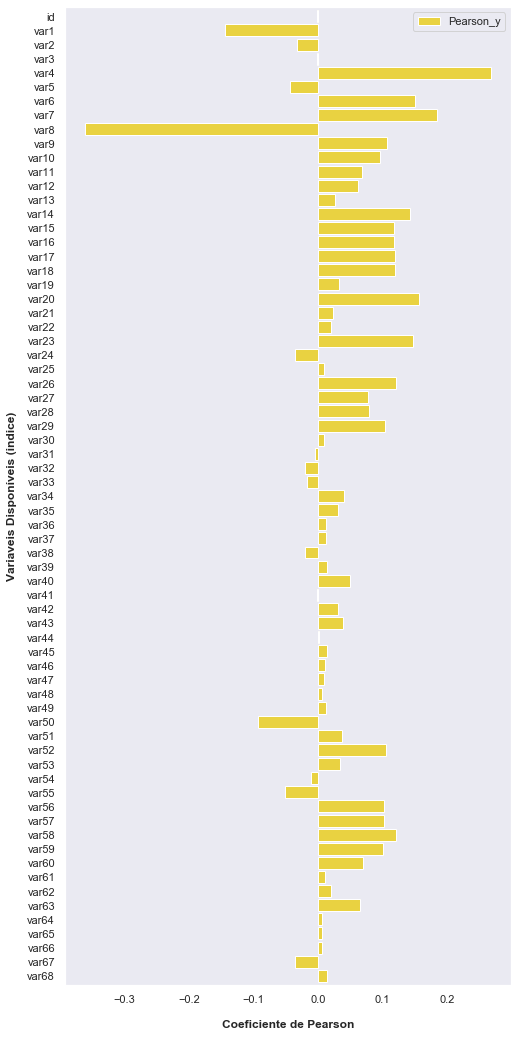

In [100]:
ax = matrix_df.plot(kind='barh', figsize=(8, 18), color='#E9D241', zorder=2, width=0.85)
#sns.heatmap(matrix_df, annot=False,  figsize=(8, 18))
ax.invert_yaxis()
ax.set_xlabel("Coeficiente de Pearson", labelpad=15, weight='bold', size=12)
ax.set_ylabel("Variaveis Disponíveis (indice)", labelpad=10, weight='bold', size=12)
ax.grid()

#### Observando as variáveis que compoem o dataset com a variável alvo apenas pela ótica da correlação de Person, o atributo `y` possui uma relação indireto mais forte com o  atributo `var8` e uma direta com `var4`.
De ínicio, é um bom indicador para definirmos o próximo passo a seguir.

#### Verificando a proporção do valor `-999` para cada atributo.

In [101]:
#quantidades de -999 em cada atributo
rep = []
por = []
total_amostras = len(dataset_bruto.index)
for col in dataset_bruto.columns:
    v = len((dataset_bruto[dataset_bruto[col] == -999]).index)
    rep.append(v)
    por.append((v/total_amostras)*100)

avaliar_999 = pd.DataFrame(data = {"Atributos": dataset_bruto.columns, "Repeticoes":rep, "Representa (%)": por})    
avaliar_999 = avaliar_999.sort_values(by="Repeticoes", ascending=False)
avaliar_999 = avaliar_999.T
avaliar_999

,65,66,60,10,8,59,12,7,6,11,57,56,26,58,9,52,18,17,16,15,4,3,2,67,61,68,51,45,46,47,48,49,50,0,63,53,54,55,62,43,64,44,35,42,28,5,13,14,19,20,21,22,23,24,25,27,29,41,30,31,32,33,34,1,36,37,38,39,40,69
Atributos,var65,var66,var60,var10,var8,var59,var12,var7,var6,var11,var57,var56,var26,var58,var9,var52,var18,var17,var16,var15,var4,var3,var2,var67,var61,var68,var51,var45,var46,var47,var48,var49,var50,id,var63,var53,var54,var55,var62,var43,var64,var44,var35,var42,var28,var5,var13,var14,var19,var20,var21,var22,var23,var24,var25,var27,var29,var41,var30,var31,var32,var33,var34,var1,var36,var37,var38,var39,var40,y
Repeticoes,12197,12197,6484,2339,2214,2182,2104,1895,1871,1719,1589,1587,1571,1571,1534,1534,1375,1375,1375,1375,936,599,599,586,346,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Representa (%),86.3627,86.3627,45.9109,16.5616,15.6766,15.45,14.8977,13.4178,13.2479,12.1716,11.2512,11.237,11.1237,11.1237,10.8617,10.8617,9.73589,9.73589,9.73589,9.73589,6.62749,4.24131,4.24131,4.14926,2.4499,0.233661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Primeira eliminação
As colunas `ID, var60, var65, var66` serão **excluidas** do dataset principal. Posteriormente, podemos voltar a considera-las no dataset.

In [102]:
dataset_p1 = dataset_bruto.drop(columns= ["id", "var60", "var65", "var66"])
dataset_p1.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var61,var62,var63,var64,var67,var68,y
count,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000
mean,9.712667,23.966579,1584.671245,15179.176025,5543.697869,1315.314168,-109.713729,-138.426680,-106.362388,-118.986688,13342.299865,3430.081144,1355.395454,19.480988,-65.831056,-65.180415,-84.422856,-93.522835,1059.038590,19.793670,1394.820435,3.478581,2.532890,0.958649,2.093181,-106.185867,0.370035,19.237485,3.644127,1.386887,0.036395,13.714508,3.141967,26.603413,394.255045,14.331162,7.585640,1.867025,3.592509,6.010338,3.096651,24.737025,6.855059,0.865751,0.275225,0.221624,0.049848,0.106068,0.343695,0.148340,0.055300,-85.239114,1.635276,1.519224,0.216031,-111.822517,-112.092123,-111.022124,-154.157900,-24.210294,0.073086,0.779221,0.028778,-41.252803,-2.154825,0.201798
std,7.269559,218.429664,1118.101765,9994.295223,3329.493664,1210.074896,350.202420,371.128392,311.608454,392.409936,9849.807542,3079.899094,642.799261,7.511958,307.502580,307.691935,300.502638,297.389385,537.377623,7.590808,688.872118,1.813111,1.112159,0.915563,1.388681,315.879767,0.482831,8.278536,1.062332,0.556791,0.187276,4.953779,1.992664,18.793208,181.868748,12.484156,8.723957,4.066404,1.006279,4.783179,1.029761,3.432140,4.048218,0.340932,0.914687,0.803367,0.269135,0.487567,0.474957,0.355449,0.228573,319.246246,0.749654,0.714010,0.022642,315.671274,315.799354,314.158769,361.158606,154.485314,0.053963,0.234068,0.018681,199.275514,48.244171,0.401357
min,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.004267,-999.000000,-999.000000,0.000000
25%,4.000000,38.000000,731.000000,6493.500000,2374.000000,482.000000,16.000000,10.000000,1.000000,14.000000,4525.500000,914.000000,811.000000,13.000000,2.000000,3.000000,3.000000,3.000000,586.000000,13.000000,796.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,15.000000,4.000000,1.000000,0.000000,10.000000,1.000000,10.000000,255.000000,2.000000,1.000000,0.000000,4.000000,2.000000,3.000000,23.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.000000,0.205161,0.117000,0.031183,0.017456,0.097918,0.169428,0.040391,0.706357,0.018357,0.117647,0.136029,0.000000
50%,5.000000,53.000000,1461.000000,15309.000000,6159.000000,1558.000000,33.000000,24.000000,3.000000,63.000000,1

In [103]:
var_continuas = ["var55", "var56", "var57", "var58", "var59", "var62", "var63", "var64", "var61"]
var_continuas_y = var_continuas + ["y"]
var_discreta = ["var67", "var54", "var44", "var52", "var51", "var50", "var49", "var48", "var47", "var46", "var45", "var40", "var68", "var27", "var25", "var24", "var53"]
var_discreta_y = var_discreta + ["y"]
var_qualitativas = [ 'var20', 'var21', 'var22', 'var23', 'var28', 'var29', 'var30', 'var31', 'var33', 'var35', 'var36', 'var37', 'var38', 'var39', 'var41', 'var19', 'var18', 'var34', 'var16', 'var17', 'var1', 'var2', 'var3', 'var4', 'var6', 'var7', 'var8', 'var9', 'var5', 'var11', 'var15', 'var10', 'var13', 'var12', 'var14', 'var26', 'var32', 'var42', 'var43' ]

#### Agora é hora de isolar as variáveis e analiza-las removendo as flags `-999`, a fim de entender suas tendências e verificar seu balanciamento
- Vamos selecionar as variáveis quantitativas continuas e discretas

In [104]:
dataset_avaliacao = dataset_bruto

In [105]:
variaveis_isoladas = {}
for col in dataset_avaliacao.columns:
    
    variaveis_isoladas[col] = (dataset_avaliacao[dataset_avaliacao[col] != -999][col].values)
    variaveis_isoladas[col] = pd.DataFrame(variaveis_isoladas[col])

#### Nota-se que os atributos já passaram por um processo de limpeza e normalização.
- A variável nº 57 `var57` é a única que não possui uma tendência aparente, e com a distribuição dos dados bem dispersos

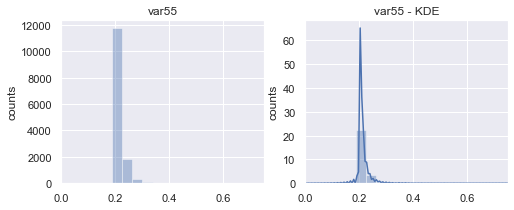

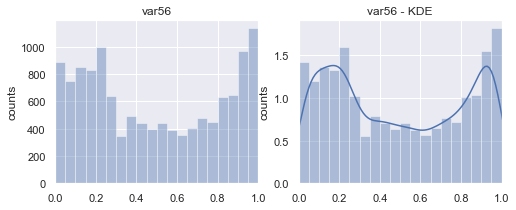

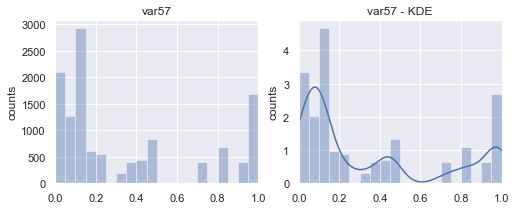

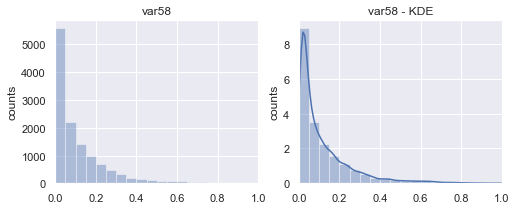

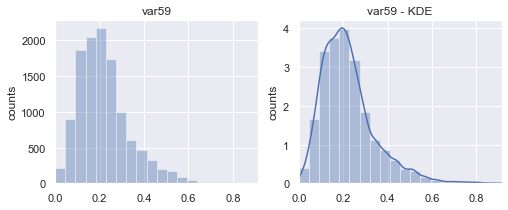

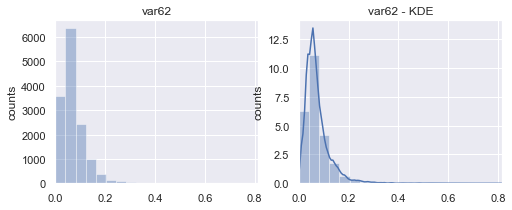

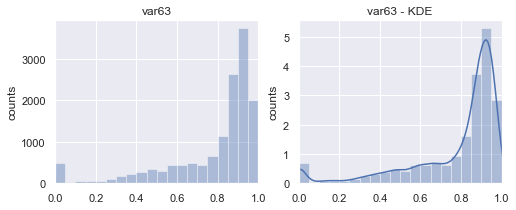

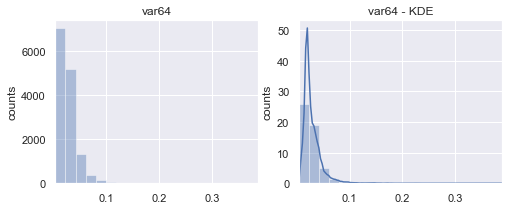

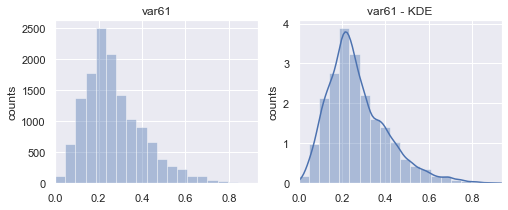

In [106]:
import seaborn as sns
sns.set(color_codes=True)

for col in var_continuas:
    f, axes = plt.subplots(1,2, sharex=True, figsize=(8, 3));
    axes[0].set_title(col)
    sns.distplot(variaveis_isoladas[col], kde=False, bins=20, ax = axes[0])
    axes[0].set(xlim=((variaveis_isoladas[col].values.min(), variaveis_isoladas[col].values.max())));
    axes[0].set_ylabel('counts');
    
    axes[1].set_title(col+" - KDE")
    sns.distplot(variaveis_isoladas[col], kde=True, bins=20, ax = axes[1])
    axes[1].set(xlim=((variaveis_isoladas[col].values.min(), variaveis_isoladas[col].values.max())));
    axes[1].set_ylabel('counts');

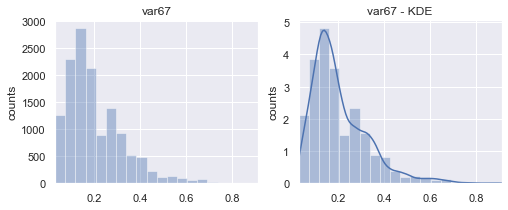

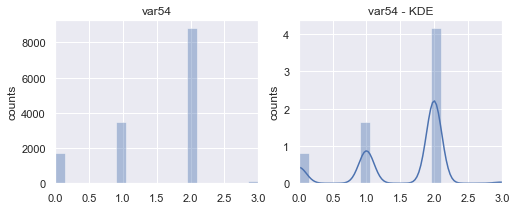

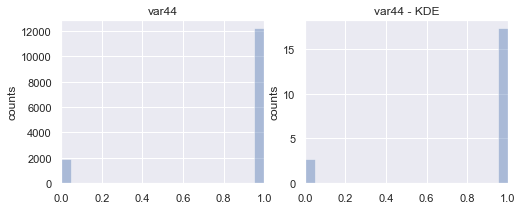

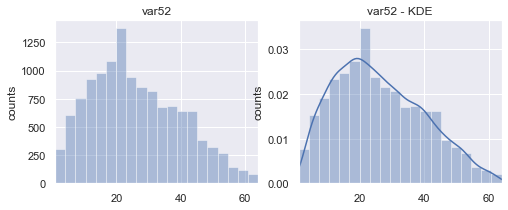

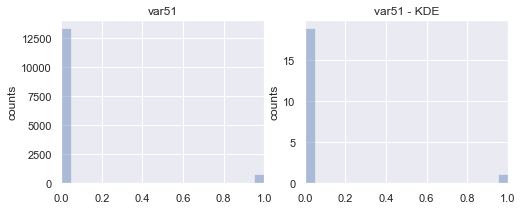

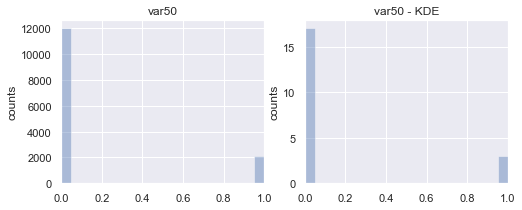

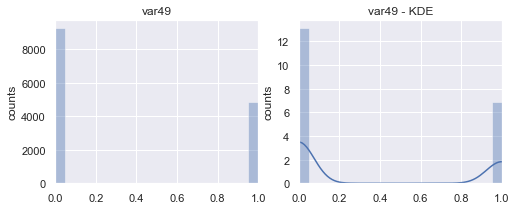

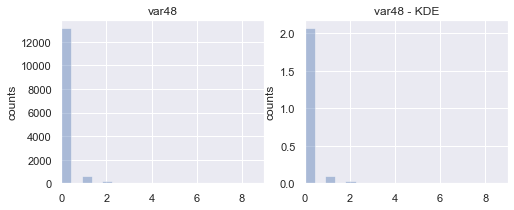

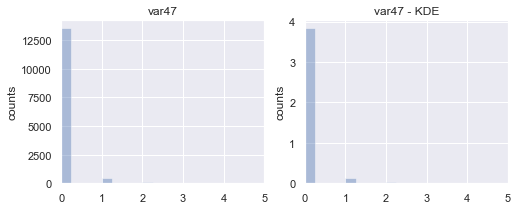

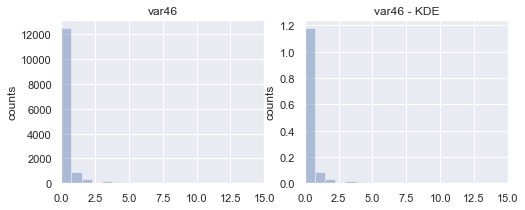

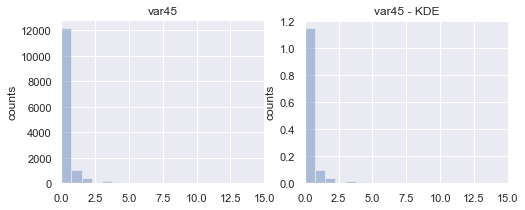

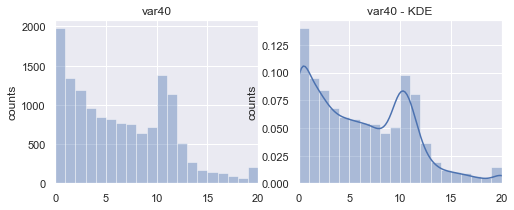

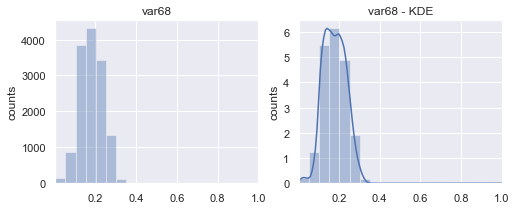

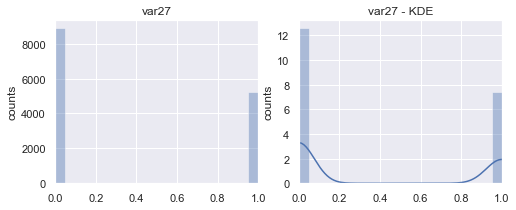

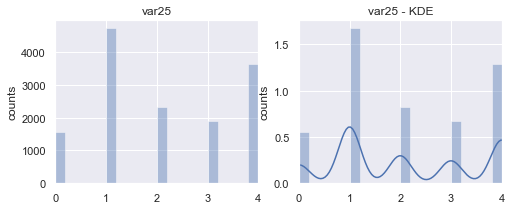

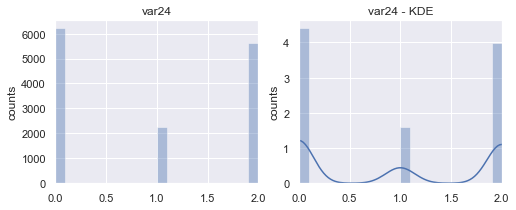

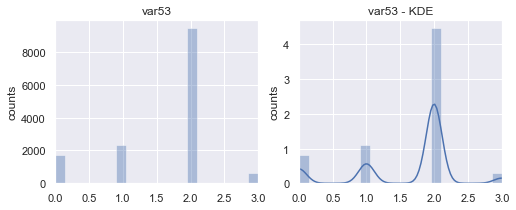

In [108]:
import seaborn as sns
sns.set(color_codes=True)

for col in var_discreta:
    f, axes = plt.subplots(1,2, sharex=True, figsize=(8, 3));
    axes[0].set_title(col)
    sns.distplot(variaveis_isoladas[col], kde=False, bins=20, ax = axes[0])
    axes[0].set(xlim=((variaveis_isoladas[col].values.min(), variaveis_isoladas[col].values.max())));
    axes[0].set_ylabel('counts');
    
    axes[1].set_title(col+" - KDE")
    sns.distplot(variaveis_isoladas[col], kde=True, bins=20, ax = axes[1])
    axes[1].set(xlim=((variaveis_isoladas[col].values.min(), variaveis_isoladas[col].values.max())));
    axes[1].set_ylabel('counts');

#### Agora vamos analizar a existência de `outliers` entre os registros das variáveis quantitativas contínuas
- OBS: Embora o dataset_bruto não seja assim tão "bruto", pois já é possível visualizar alguns procedimentos de limpeza.
- OBS 1: Posteriormente, se possível, com maior tempo será possível realizar uma análise mais a fundo. Por hora, os gráficos não apresentam nada tão alarmante para focarmos ainda mais nessa etapa.

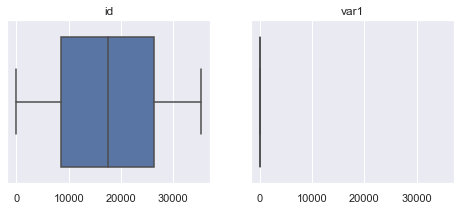

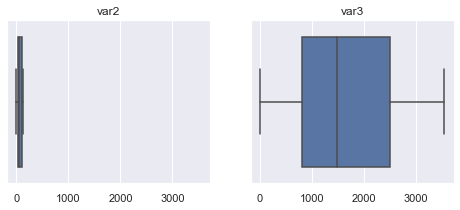

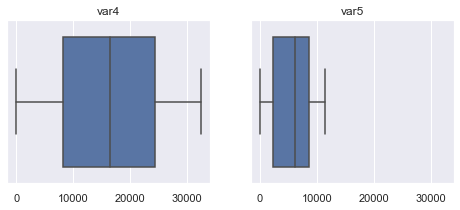

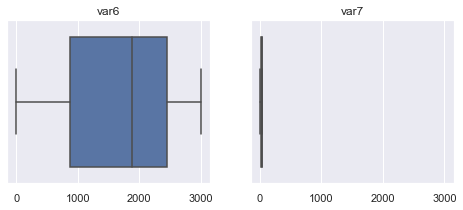

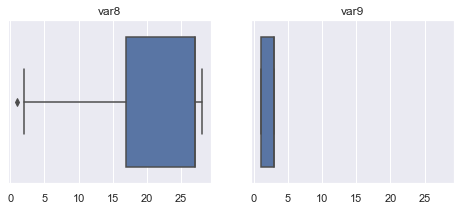

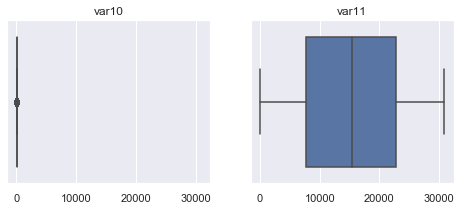

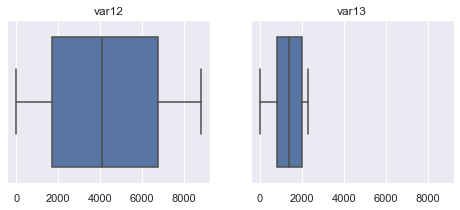

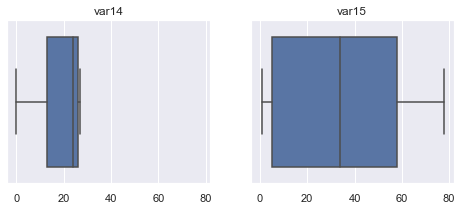

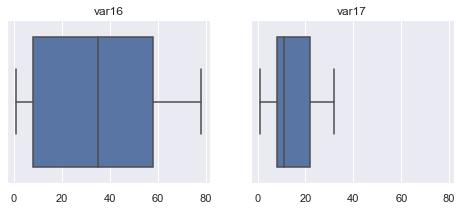

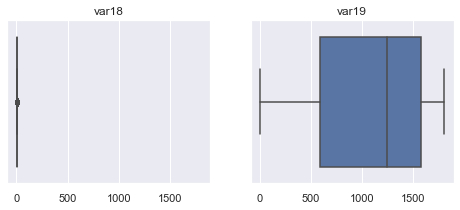

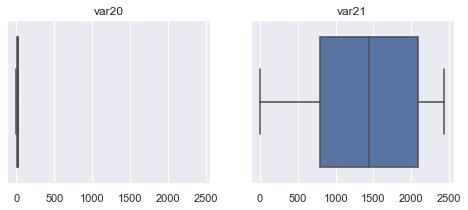

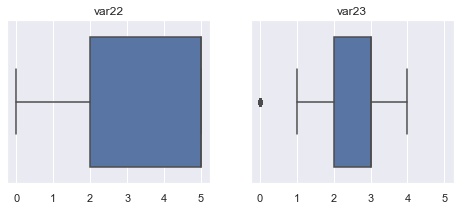

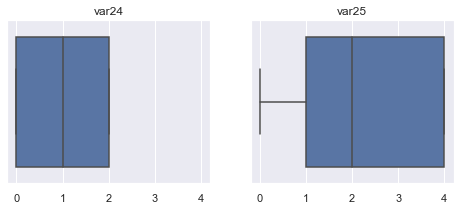

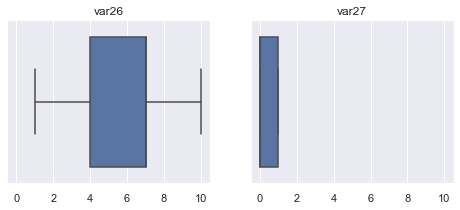

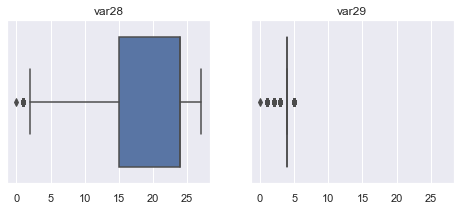

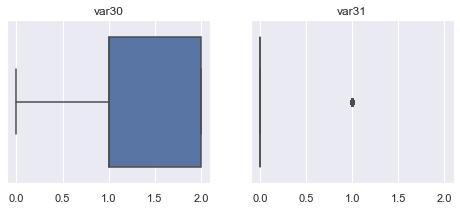

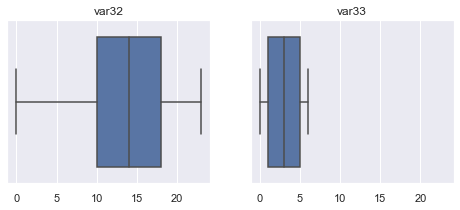

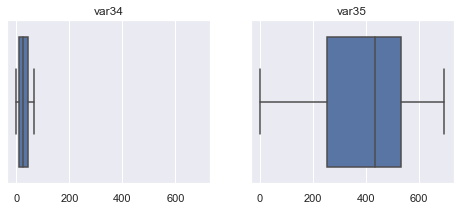

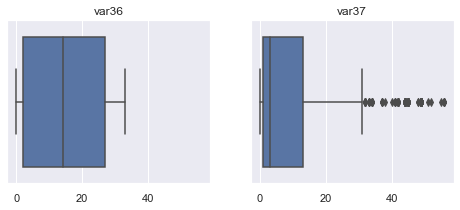

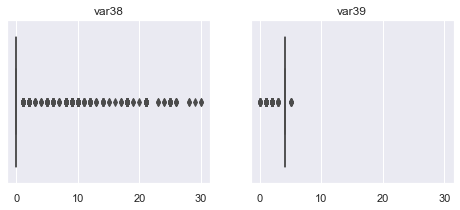

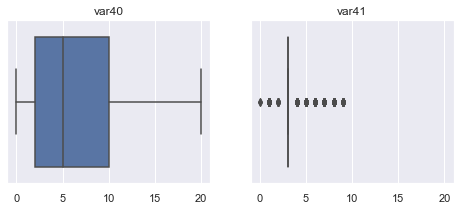

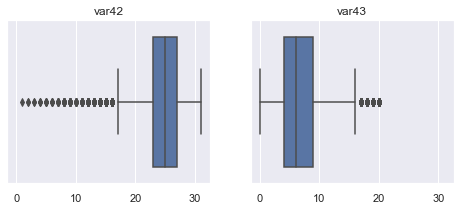

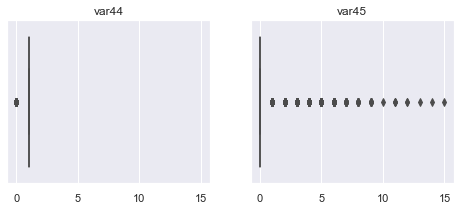

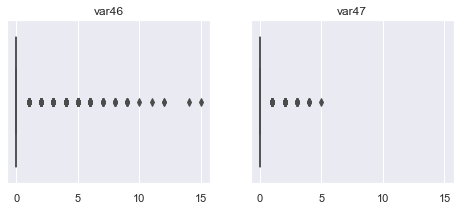

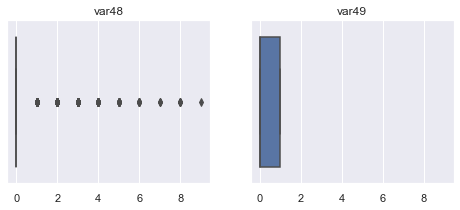

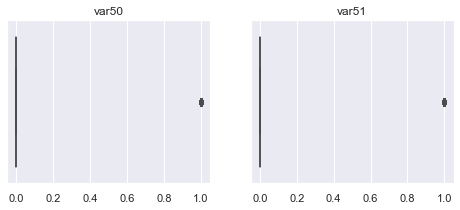

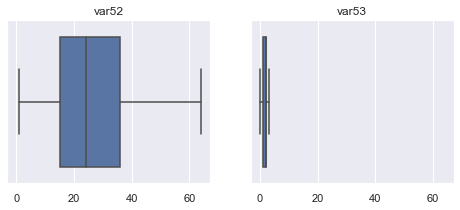

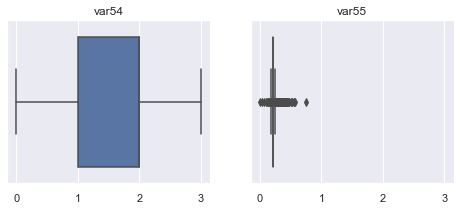

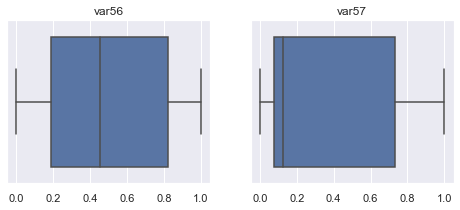

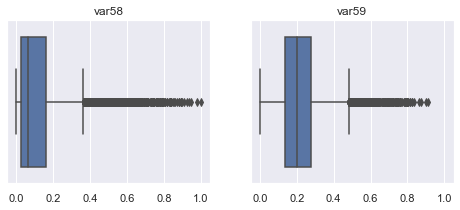

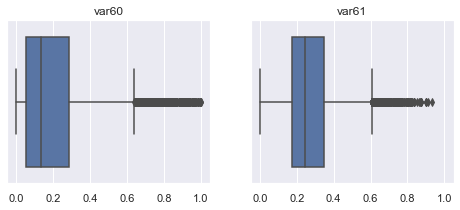

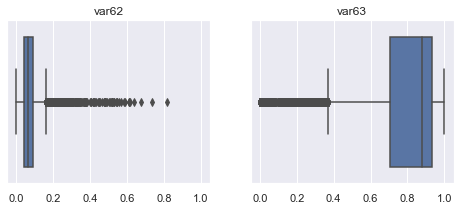

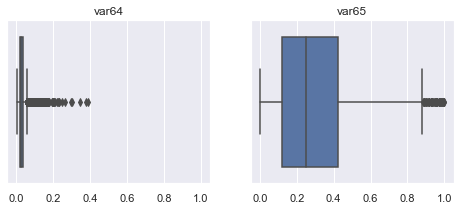

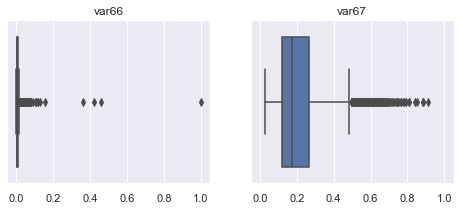

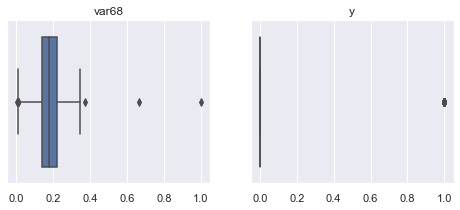

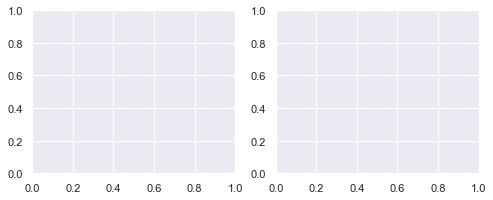

In [109]:
nome_colunas = dataset_bruto.columns
i = 0
while True:
    try:
        f, axes = plt.subplots(1,2, sharex=True, figsize=(8, 3));
        axes[0].set_title(nome_colunas[i])
        sns.boxplot(x=variaveis_isoladas[nome_colunas[i]],ax = axes[0])
        sns.boxplot(x=variaveis_isoladas[nome_colunas[i+1]],ax = axes[1])
        axes[1].set_title(nome_colunas[i+1])
        i = i + 2
    except:
        break;

Iniciando o processo de transformação de dados para os datasets de treinamento, validação e teste
- 
#### Para este desafio irei trabalhar com alguns cenários iniciais de tratamento do dataset para posterior construção de um modelo de classificação (Y):
- **Cenário 1**: O dataset bruto (como foi enviado): `dataset_bruto`
- **Cenário 2**: O dataset excluindo variaveis com grandes proporções de valores `-999` : `dataset_p1`
- **Cenário 3**: O `dataset_bruto` aplicando a normalização em todas as variáveis: `dataset_n1`
- **Cenário 4**: O `dataset_p1` apliccando a normalização em todas as variáveis: `dataset_n2`
- **Cenário 5**: O `dataset_p1` aplicando a normalização somente nas variáveis qualitativa (nominais e ordinais) e quantitativas discretas: `dataset_n3` 
- **Cenário 6**: O `dataset_p1` passará por seleção de variáveis de acordo com o indice de importancia de permutação. O fator de importância também pode ser extraido por técnicas baseadas em Àrvore de Decisão.
- **Cenário 7**: O `dataset_p1` passará por redução de dimensão com a utilização da técnica PCA. (Adiantando um pouco... a mesma não apontou separidade entre os rótulos).

#OBS: Suspeito que as variáveis já passaram algum pré-processamento.

In [110]:
### Dataset Cenário 1
y_bruto = dataset_bruto['y']
X_bruto_sem_norm = dataset_bruto.drop(columns= ['y', 'id'])
X_col_nomes_bruto = X_bruto_sem_norm.columns

## Dataset Cenário 2
y_p1 = dataset_p1['y']
X_p1_sem_norm = dataset_p1.drop(columns= ['y'])
X_col_nomes_p1 = X_p1_sem_norm.columns

In [111]:
##Dataset Cenário 3
scaler = preprocessing.StandardScaler().fit(X_bruto_sem_norm)
X_scaled_n1 = scaler.transform(X_bruto_sem_norm)

scaled_df_n1 = pd.DataFrame(X_scaled_n1, index= X_bruto_sem_norm.index, columns=X_bruto_sem_norm.columns)
#scaled_df_n1['y']= y_bruto
scaled_df_n1

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,1.140045,-0.022738,1.134399,1.427147,-1.248792,0.925336,0.413243,-2.318884,0.350973,0.463783,-0.694891,-0.735141,1.013734,0.867849,0.256368,0.247595,0.317555,0.327941,0.908074,0.817640,0.977255,-1.367080,0.420018,-1.047096,1.373163,0.358332,-0.766413,0.575305,0.335004,1.101194,-0.194343,0.461380,-0.071247,0.925718,0.378006,1.014829,-0.640287,-0.459151,0.404963,0.625059,-0.093861,0.076624,-0.211226,0.393785,4.072330,3.458537,3.530519,-0.217553,-0.723658,-0.417345,-0.241944,0.398575,-0.847455,-0.727220,-0.159764,0.354684,0.357599,0.353528,0.427019,0.921522,0.157643,-0.313932,-0.626021,-0.252854,2.516368,2.516505,0.207685,0.047562
1,-0.785862,0.393886,0.358950,-0.149608,0.494177,-1.912606,-2.539439,0.418810,0.350973,0.463783,0.065658,-0.952364,1.452456,-0.463409,0.217343,0.221594,0.290932,0.324579,1.373313,-0.499789,1.483898,0.839150,-1.378349,1.137429,-0.787236,0.355166,1.304779,-1.840666,-1.547712,-0.694875,-0.194343,0.057633,-1.576823,-1.362424,0.757413,-0.987780,-0.754918,-0.459151,0.404963,0.206912,-0.093861,1.533493,-0.952319,-2.539457,-0.300906,-0.275879,-0.185221,-0.217553,-0.723658,-0.417345,-0.241944,0.329660,-0.847455,-0.727220,0.563245,0.355226,0.355927,0.353628,0.427547,-1.085417,-6.310142,-0.038823,-0.022451,-0.506560,-0.397376,-0.397376,0.207759,0.046877
2,-1.336121,0.068827,-0.505939,-0.495018,-1.461444,-0.433306,0.358987,-2.318884,0.350973,0.463783,-0.365837,-0.931259,-1.111421,-1.262164,0.324663,0.322348,0.314228,0.327941,-1.019875,-1.290247,-1.060932,0.839150,0.420018,1.137429,-0.787236,0.358332,-0.766413,-1.961465,0.335004,-0.694875,-0.194343,-0.547987,-1.074964,-1.255999,-1.722485,0.934725,-0.525656,-0.459151,0.404963,-0.629381,-0.093861,-0.506123,-0.458257,0.393785,-0.300906,-0.275879,-0.185221,-0.217553,-0.723658,-0.417345,-0.241944,0.304600,-0.847455,-0.727220,-0.503284,0.354925,0.356390,0.353467,0.427452,-1.085417,0.158021,-0.408436,0.861348,-0.548274,-0.397376,-0.397376,0.208940,0.049696
3,1.415175,0.068827,0.148765,-1.249775,0.808350,-0.225873,0.350420,0.399948,0.344555,0.338909,-1.061205,1.010107,-0.846944,-1.528416,0.405966,0.406851,0.357490,0.331304,-0.809587,-1.553733,-0.806884,-1.918638,-2.277533,-1.047096,-1.507369,0.339337,1.304779,-0.028688,-2.489071,1.101194,-0.194343,-1.153606,-1.576823,-0.830298,0.108571,1.014829,-0.869549,-0.459151,0.404963,0.834132,-0.093861,-0.797497,0.776898,0.393785,0.792403,0.968926,-0.185221,1.833518,1.381868,-0.417345,-0.241944,0.379780,-0.847455,-0.727220,-0.341499,0.356518,0.355280,0.354059,0.427825,-1.085417,0.159002,-0.533435,0.736323,-0.272686,2.516689,2.516493,0.207759,0.047410
4,-0.373168,0.091719,0.605806,1.425746,0.146364,-0.835775,0.358987,-2.318884,0.350973,0.463783,0.020174,1.236422,-1.704162,-1.262164,0.392957,0.393851,0.347506,0.331304,0.658706,-1.290247,-1.632901,-0.815523,0.420018,1.137429,-0.787236,0.361498,1.304779,-1.961465,0.335004,-0.694875,-0.194343,0.663253,0.430611,-1.255999,0.949867,-0.507154,-0.525656,0.032702,0.404963,-0.211235,-0.093861,0.367998,-0.458257,0.393785,-0.300906,-0.275879,-0.185221,-0.217553,1.381868,-0.417345,-0.241944,0.326528,-0.847455,-0.727220,0.303199,0.356138,0.355280,0.353854,0.427383,0.920939,0.158185,-0.258716,0.542318,-0.430653,-0.397376,-0.397376,0.209309,0.047410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,-0.785862,0.068827,0.828513,1.359506,-1.331991,0.643525,0.401821,0.437672,0.350973,

In [112]:
##Dataset Cenário 4
scaler = preprocessing.StandardScaler().fit(X_p1_sem_norm)
X_scaled_n2 = scaler.transform(X_p1_sem_norm)

scaled_df_n2 = pd.DataFrame(X_scaled_n2, index= X_p1_sem_norm.index, columns=X_p1_sem_norm.columns)
#scaled_df_n2['y']= y_p1
scaled_df_n2

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var61,var62,var63,var64,var67,var68
0,1.140045,-0.022738,1.134399,1.427147,-1.248792,0.925336,0.413243,-2.318884,0.350973,0.463783,-0.694891,-0.735141,1.013734,0.867849,0.256368,0.247595,0.317555,0.327941,0.908074,0.817640,0.977255,-1.367080,0.420018,-1.047096,1.373163,0.358332,-0.766413,0.575305,0.335004,1.101194,-0.194343,0.461380,-0.071247,0.925718,0.378006,1.014829,-0.640287,-0.459151,0.404963,0.625059,-0.093861,0.076624,-0.211226,0.393785,4.072330,3.458537,3.530519,-0.217553,-0.723658,-0.417345,-0.241944,0.398575,-0.847455,-0.727220,-0.159764,0.354684,0.357599,0.353528,0.427019,0.157643,-0.313932,-0.626021,-0.252854,0.207685,0.047562
1,-0.785862,0.393886,0.358950,-0.149608,0.494177,-1.912606,-2.539439,0.418810,0.350973,0.463783,0.065658,-0.952364,1.452456,-0.463409,0.217343,0.221594,0.290932,0.324579,1.373313,-0.499789,1.483898,0.839150,-1.378349,1.137429,-0.787236,0.355166,1.304779,-1.840666,-1.547712,-0.694875,-0.194343,0.057633,-1.576823,-1.362424,0.757413,-0.987780,-0.754918,-0.459151,0.404963,0.206912,-0.093861,1.533493,-0.952319,-2.539457,-0.300906,-0.275879,-0.185221,-0.217553,-0.723658,-0.417345,-0.241944,0.329660,-0.847455,-0.727220,0.563245,0.355226,0.355927,0.353628,0.427547,-6.310142,-0.038823,-0.022451,-0.506560,0.207759,0.046877
2,-1.336121,0.068827,-0.505939,-0.495018,-1.461444,-0.433306,0.358987,-2.318884,0.350973,0.463783,-0.365837,-0.931259,-1.111421,-1.262164,0.324663,0.322348,0.314228,0.327941,-1.019875,-1.290247,-1.060932,0.839150,0.420018,1.137429,-0.787236,0.358332,-0.766413,-1.961465,0.335004,-0.694875,-0.194343,-0.547987,-1.074964,-1.255999,-1.722485,0.934725,-0.525656,-0.459151,0.404963,-0.629381,-0.093861,-0.506123,-0.458257,0.393785,-0.300906,-0.275879,-0.185221,-0.217553,-0.723658,-0.417345,-0.241944,0.304600,-0.847455,-0.727220,-0.503284,0.354925,0.356390,0.353467,0.427452,0.158021,-0.408436,0.861348,-0.548274,0.208940,0.049696
3,1.415175,0.068827,0.148765,-1.249775,0.808350,-0.225873,0.350420,0.399948,0.344555,0.338909,-1.061205,1.010107,-0.846944,-1.528416,0.405966,0.406851,0.357490,0.331304,-0.809587,-1.553733,-0.806884,-1.918638,-2.277533,-1.047096,-1.507369,0.339337,1.304779,-0.028688,-2.489071,1.101194,-0.194343,-1.153606,-1.576823,-0.830298,0.108571,1.014829,-0.869549,-0.459151,0.404963,0.834132,-0.093861,-0.797497,0.776898,0.393785,0.792403,0.968926,-0.185221,1.833518,1.381868,-0.417345,-0.241944,0.379780,-0.847455,-0.727220,-0.341499,0.356518,0.355280,0.354059,0.427825,0.159002,-0.533435,0.736323,-0.272686,0.207759,0.047410
4,-0.373168,0.091719,0.605806,1.425746,0.146364,-0.835775,0.358987,-2.318884,0.350973,0.463783,0.020174,1.236422,-1.704162,-1.262164,0.392957,0.393851,0.347506,0.331304,0.658706,-1.290247,-1.632901,-0.815523,0.420018,1.137429,-0.787236,0.361498,1.304779,-1.961465,0.335004,-0.694875,-0.194343,0.663253,0.430611,-1.255999,0.949867,-0.507154,-0.525656,0.032702,0.404963,-0.211235,-0.093861,0.367998,-0.458257,0.393785,-0.300906,-0.275879,-0.185221,-0.217553,1.381868,-0.417345,-0.241944,0.326528,-0.847455,-0.727220,0.303199,0.356138,0.355280,0.353854,0.427383,0.158185,-0.258716,0.542318,-0.430653,0.209309,0.047410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,-0.785862,0.068827,0.828513,1.359506,-1.331991,0.643525,0.401821,0.437672,0.350973,-2.242666,-0.838655,-1.438111,0.501892,0.468471,0.392957,0.393851,0.347506,0.331304,-1.602354,0.422411,0.499645,0.839150,1.319202,1.137429,-0.787236,0.358332,-0.766413,0.8169

In [113]:
##Dataset Cenário 5

y_bruto_n3 = dataset_bruto['y']
X_bruto_n3 = dataset_bruto.drop(columns= ['y','id'])
#X_bruto_n3 = X_p1_n3[var_qualitativas]

scaler = preprocessing.StandardScaler().fit(X_bruto_n3[var_qualitativas+var_discreta])
X_bruto_n3[var_qualitativas+var_discreta] = scaler.transform(X_bruto_n3[var_qualitativas+var_discreta])

scaled_df_n3 = pd.DataFrame(X_bruto_n3, index= X_bruto_n3.index, columns= dataset_bruto.columns[1:-1])
scaled_df_n3

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,1.140045,-0.022738,1.134399,1.427147,-1.248792,0.925336,0.413243,-2.318884,0.350973,0.463783,-0.694891,-0.735141,1.013734,0.867849,0.256368,0.247595,0.317555,0.327941,0.908074,0.817640,0.977255,-1.367080,0.420018,-1.047096,1.373163,0.358332,-0.766413,0.575305,0.335004,1.101194,-0.194343,0.461380,-0.071247,0.925718,0.378006,1.014829,-0.640287,-0.459151,0.404963,0.625059,-0.093861,0.076624,-0.211226,0.393785,4.072330,3.458537,3.530519,-0.217553,-0.723658,-0.417345,-0.241944,0.398575,-0.847455,-0.727220,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.207685,0.047562
1,-0.785862,0.393886,0.358950,-0.149608,0.494177,-1.912606,-2.539439,0.418810,0.350973,0.463783,0.065658,-0.952364,1.452456,-0.463409,0.217343,0.221594,0.290932,0.324579,1.373313,-0.499789,1.483898,0.839150,-1.378349,1.137429,-0.787236,0.355166,1.304779,-1.840666,-1.547712,-0.694875,-0.194343,0.057633,-1.576823,-1.362424,0.757413,-0.987780,-0.754918,-0.459151,0.404963,0.206912,-0.093861,1.533493,-0.952319,-2.539457,-0.300906,-0.275879,-0.185221,-0.217553,-0.723658,-0.417345,-0.241944,0.329660,-0.847455,-0.727220,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.207759,0.046877
2,-1.336121,0.068827,-0.505939,-0.495018,-1.461444,-0.433306,0.358987,-2.318884,0.350973,0.463783,-0.365837,-0.931259,-1.111421,-1.262164,0.324663,0.322348,0.314228,0.327941,-1.019875,-1.290247,-1.060932,0.839150,0.420018,1.137429,-0.787236,0.358332,-0.766413,-1.961465,0.335004,-0.694875,-0.194343,-0.547987,-1.074964,-1.255999,-1.722485,0.934725,-0.525656,-0.459151,0.404963,-0.629381,-0.093861,-0.506123,-0.458257,0.393785,-0.300906,-0.275879,-0.185221,-0.217553,-0.723658,-0.417345,-0.241944,0.304600,-0.847455,-0.727220,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.208940,0.049696
3,1.415175,0.068827,0.148765,-1.249775,0.808350,-0.225873,0.350420,0.399948,0.344555,0.338909,-1.061205,1.010107,-0.846944,-1.528416,0.405966,0.406851,0.357490,0.331304,-0.809587,-1.553733,-0.806884,-1.918638,-2.277533,-1.047096,-1.507369,0.339337,1.304779,-0.028688,-2.489071,1.101194,-0.194343,-1.153606,-1.576823,-0.830298,0.108571,1.014829,-0.869549,-0.459151,0.404963,0.834132,-0.093861,-0.797497,0.776898,0.393785,0.792403,0.968926,-0.185221,1.833518,1.381868,-0.417345,-0.241944,0.379780,-0.847455,-0.727220,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.207759,0.047410
4,-0.373168,0.091719,0.605806,1.425746,0.146364,-0.835775,0.358987,-2.318884,0.350973,0.463783,0.020174,1.236422,-1.704162,-1.262164,0.392957,0.393851,0.347506,0.331304,0.658706,-1.290247,-1.632901,-0.815523,0.420018,1.137429,-0.787236,0.361498,1.304779,-1.961465,0.335004,-0.694875,-0.194343,0.663253,0.430611,-1.255999,0.949867,-0.507154,-0.525656,0.032702,0.404963,-0.211235,-0.093861,0.367998,-0.458257,0.393785,-0.300906,-0.275879,-0.185221,-0.217553,1.381868,-0.417345,-0.241944,0.326528,-0.847455,-0.727220,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.209309,0.047410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,-0.785862,0.068827,0.828513,1.359506,-1.331991,0.643525,0.401821,0.437672,0.350973,-2.242666,-0.83

Ciclo de construção do modelo de classificação [treinamento, validação e teste]
-
- Foram escolhidos dois algoritmos com base na técnica de Árvore de Decisão: RandomForest e XGBClassifier.
- Para analisar somente o impacto dos `cenários` iniciais das variáveis de entrada para a predição será utilizado a técnica RandomForest, principalmente pela sua rapidez na construção dos modelos e por permitir visualizar os relacionamentos e hiarquia entre as varíaveis.
- Posteriormente, seria interessante executar processos de seleções de atributos baseadas no Fator de Importância disponibilizado pela técnica. No final deste `Notebook` é possível verificar o inicio deste processo.


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3400
           1       0.72      0.46      0.57       837

    accuracy                           0.86      4237
   macro avg       0.80      0.71      0.74      4237
weighted avg       0.85      0.86      0.85      4237



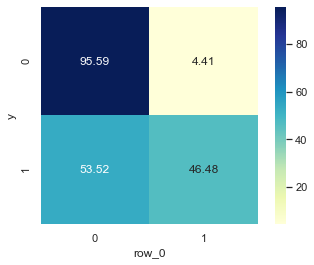

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_n1, y_bruto, test_size = 0.3)
model = RandomForestClassifier(max_depth = 20, random_state = 123, n_estimators = 50)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
#cf_mt = pd.DataFrame(data = conf_matrix(Y_test, y_pred), columns= ["TP", "FP","TN","FN"])
#cf_mt
contingency_matrix = pd.crosstab( y_pred, Y_test)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

fig, ax = plt.subplots()
plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3403
           1       0.78      0.48      0.60       834

    accuracy                           0.87      4237
   macro avg       0.83      0.72      0.76      4237
weighted avg       0.86      0.87      0.86      4237



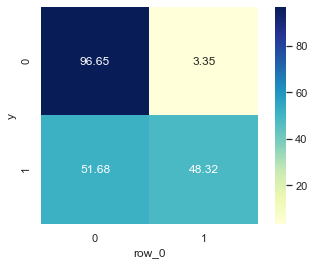

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_n1, y_bruto, test_size = 0.3)
model = RandomForestClassifier(max_depth = 20, random_state = 123, n_estimators = 50)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
#cf_mt = pd.DataFrame(data = conf_matrix(Y_test, y_pred), columns= ["TP", "FP","TN","FN"])
#cf_mt
contingency_matrix = pd.crosstab( y_pred, Y_test)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

fig, ax = plt.subplots()
plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3361
           1       0.78      0.48      0.59       876

    accuracy                           0.86      4237
   macro avg       0.83      0.72      0.76      4237
weighted avg       0.86      0.86      0.85      4237



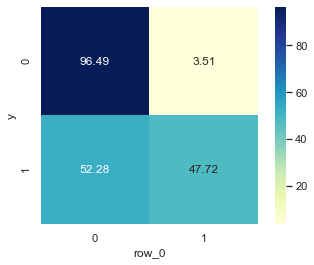

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_n2, y_bruto, test_size = 0.3)
model = RandomForestClassifier(max_depth = 20, random_state = 123, n_estimators = 50)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
#cf_mt = pd.DataFrame(data = conf_matrix(Y_test, y_pred), columns= ["TP", "FP","TN","FN"])
#cf_mt
contingency_matrix = pd.crosstab( y_pred, Y_test)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

fig, ax = plt.subplots()
plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3350
           1       0.77      0.50      0.61       887

    accuracy                           0.86      4237
   macro avg       0.82      0.73      0.76      4237
weighted avg       0.86      0.86      0.85      4237



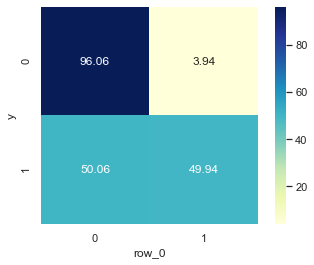

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_df_n3, y_bruto, test_size = 0.3)
model = RandomForestClassifier(max_depth = 15, random_state = 123, n_estimators = 300)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
#cf_mt = pd.DataFrame(data = conf_matrix(Y_test, y_pred), columns= ["TP", "FP","TN","FN"])
#cf_mt
contingency_matrix = pd.crosstab( y_pred, Y_test)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

fig, ax = plt.subplots()
plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3407
           1       0.75      0.50      0.60       830

    accuracy                           0.87      4237
   macro avg       0.82      0.73      0.76      4237
weighted avg       0.86      0.87      0.86      4237



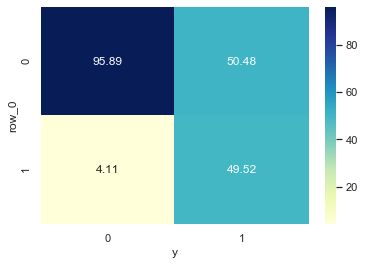

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X_bruto_n3, y_bruto, test_size = 0.3)
model = RandomForestClassifier(max_depth = 15, random_state = 123, n_estimators = 150)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
#cf_mt = pd.DataFrame(data = conf_matrix(Y_test, y_pred), columns= ["TP", "FP","TN","FN"])
#cf_mt
contingency_matrix = pd.crosstab( y_pred, Y_test)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

#### Considerações:
- Ao final desta etapa é possível notar que nos diferentes cenários os modelos conseguiram classificar de forma excelente o rótulo `0 - desisteresse do cliente`.
- Se avaliarmos apenas a métrica `score` poderia passar despercebido o fracasso do modelo em classificar o rótulo `1 - interesse do cliente`.
- No inicio do notebook quando estavamos analisando estatísticamente os atributos foi possível notar a quantidade de amostras por rotúlo, o que apontou um desbalanceamento bem grande. Como é possível visualizar no grafico abaixo.
- Antes de buscar maneiras de corrigir esse desbalanceado, foi feita uma tentativa de visualizar melhor a distribuição destas classe em nosso universo. Foi usada a técnica PCA para esta tarefa.

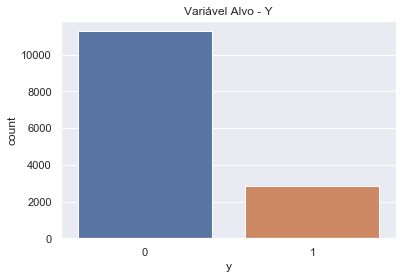

In [129]:
ax = sns.countplot(x="y", data=dataset_bruto)
ax.set_title('Variável Alvo - Y');

#### Aplicando PCA para verificar a dispersão entre as componentes e as classes Y (0 e 1)
- Analisando os gráficos de dispersão, é possível ver que até a quinta componente principal os dados não apontam tendências individuais para as duas classes.
- Não foi possível definir visualmente clusters em nenhum dos gráficos acima.

In [133]:
n_comp = 3
all_componentes = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']
pca = PCA(n_components=n_comp)
#principalComponents = pca.fit_transform(X_scaled)
#principalComponents = pca.fit_transform(X_bruto_n3)
principalComponents = pca.fit_transform(X_scaled_n2)
#principalComponents = pca.fit_transform(X_scaled_n3)
X_pc = pd.DataFrame(data=principalComponents, columns=all_componentes[:n_comp])
dataset_pc = pd.concat([X_pc, y_bruto], axis=1)
dataset_pc

,principal component 1,principal component 2,principal component 3,y
0,-1.373652,2.718308,3.323423,1
1,0.378338,-1.762870,0.336082,0
2,0.006606,-2.506872,-1.942970,0
3,-0.430936,-3.361399,3.261515,0
4,-0.947520,-2.589989,-0.096290,1
...,...,...,...,...
14118,-0.819853,0.693073,-2.156621,0
14119,11.089686,0.232192,-0.066771,0
14120,-1.023082,-0.344480,-2.618240,0
14121,-2.024529,1.249547,0.673360,0


<Figure size 432x432 with 0 Axes>

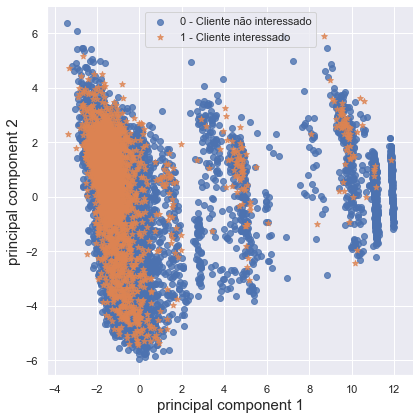

<Figure size 432x432 with 0 Axes>

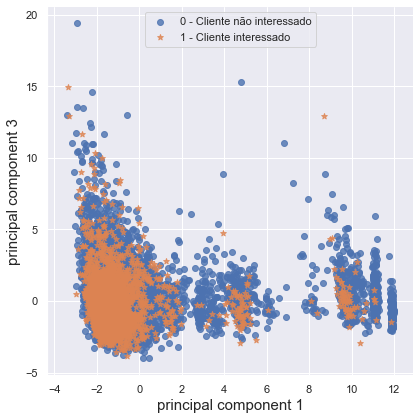

<Figure size 432x432 with 0 Axes>

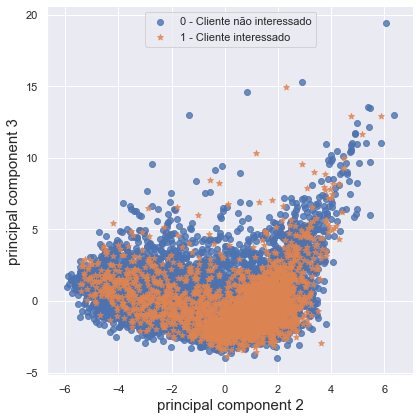

In [134]:
fig_size = (6, 6)
class_names = ['0 - Cliente não interessado','1 - Cliente interessado']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
markers = ['o', '*']

for col1 in all_componentes[:n_comp-1]:
    for col2 in all_componentes[1:n_comp]:
        if(col1 != col2):   
        
            plt.figure(figsize = fig_size)
            sns.lmplot(x=col1,
                           y=col2,
                           data=dataset_pc,
                      fit_reg=False,
                      hue="y", markers=markers, legend=False, legend_out=False, height=fig_size[1], aspect=fig_size[0]/fig_size[1])

            plt.legend(class_names, loc=9)
            plt.xlabel(col1, fontsize=15)
            plt.ylabel(col2, fontsize=15)
            plt.tight_layout()


#### Tentativa para melhor visualização
- técnica PCA foi testada até a sexta componente, porém, nenhuma combinação conseguiu definir bem os agrupamentos, mesmo com a visualização 3D.

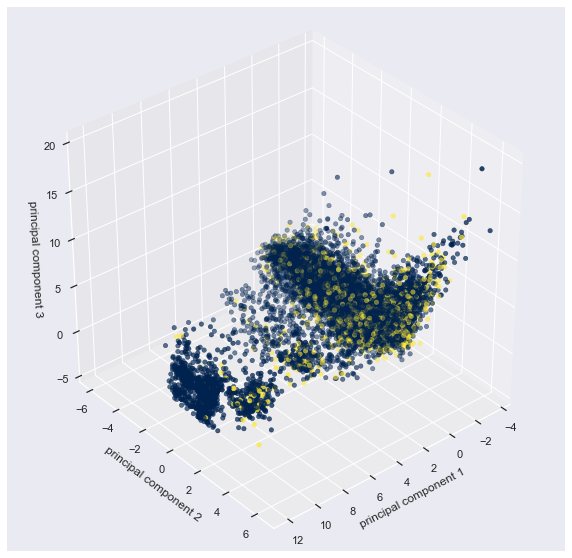

In [136]:
class_names = ['0 - Cliente não interessado','1 - Cliente interessado']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
markers = ['o', '*']

ax = plt.figure(figsize = (10,10))

ax = plt.axes(projection='3d')
ax.scatter(dataset_pc[all_componentes[0]], dataset_pc[all_componentes[1]], dataset_pc[all_componentes[2]], c=y_bruto,  cmap='cividis', linewidth=0.5);

ax.set_xlabel(all_componentes[0])
ax.set_ylabel(all_componentes[1])
ax.set_zlabel(all_componentes[2])

ax.view_init(35, 50)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2281
           1       0.35      0.05      0.09       544

    accuracy                           0.80      2825
   macro avg       0.58      0.51      0.49      2825
weighted avg       0.72      0.80      0.73      2825



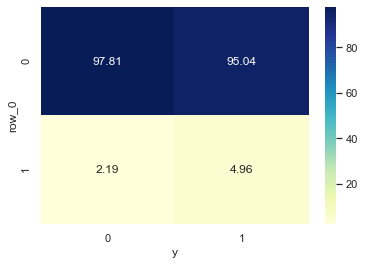

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pc, y_bruto, test_size = 0.2)
model = RandomForestClassifier(max_depth = 20, random_state = 123, n_estimators = 100)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
#cf_mt = pd.DataFrame(data = conf_matrix(Y_test, y_pred), columns= ["TP", "FP","TN","FN"])
#cf_mt
contingency_matrix = pd.crosstab( y_pred, Y_test)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

[23:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2242
           1       0.73      0.55      0.63       583

    accuracy                           0.87      2825
   macro avg       0.81      0.75      0.77      2825
weighted avg       0.86      0.87      0.86      2825



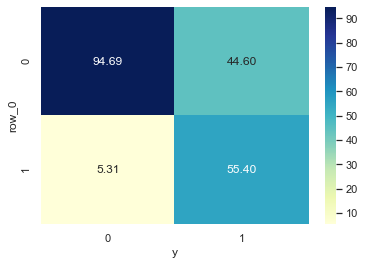

[23:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [141]:
#X_train, X_test, Y_train, Y_test = train_test_split(X_bruto_n3, y_bruto, random_state = 123, test_size = 0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(X_pc, y_bruto, random_state = 123, test_size = 0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_n1, y_bruto, random_state = 123, test_size = 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_n2, y_bruto, random_state = 123, test_size = 0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_n3, y_bruto, random_state = 123, test_size = 0.2)
model = XGBClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

contingency_matrix = pd.crosstab( y_pred, Y_test)
soma = contingency_matrix.sum()
contingency_matrix = contingency_matrix * 100.0 / ( 1.0 * soma )
contingency_matrix = contingency_matrix.rename(columns={'col_0': 'y_real', 'y': 'y_predito'})

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingency_matrix, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

# - cross validataion
scores = cross_val_score(model,X_train, Y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
print(cm)

In [142]:
y = dataset_p1['y']
X = dataset_p1.drop(columns= ['y'])
X_featurenames = X.columns

### Random Forest Classification Feature Importance
- 

In [143]:
seed_list = [123, 5, 8, 13, 6]
df_rf = []
for seed in seed_list:
    model = RandomForestRegressor(random_state = seed)
    model.fit(X, y)
    importance = model.feature_importances_
    #for i,v in enumerate(importance):
    #    print('Feature: %0d, Score: %.5f' % (i,v))
    df = pd.DataFrame({'Inputs': [j for j in range(len(importance))], 'Importance': importance})
    df = df.set_index('Inputs')
    df = df.sort_values(by='Importance', ascending= False)
    
    df_rf.append(df)

In [144]:
df_rf

[        Importance
 Inputs            
 3         0.283204
 7         0.064383
 54        0.034329
 6         0.032448
 55        0.028849
 2         0.025986
 61        0.023236
 4         0.022437
 58        0.020221
 60        0.020054
 34        0.019997
 62        0.019895
 51        0.019774
 59        0.019631
 63        0.019316
 57        0.017555
 5         0.016764
 64        0.016756
 11        0.016662
 10        0.016437
 0         0.016289
 33        0.014687
 31        0.013693
 12        0.013635
 18        0.013369
 1         0.012863
 39        0.012842
 42        0.012108
 41        0.011279
 36        0.009658
 20        0.009366
 35        0.009157
 32        0.008518
 53        0.006683
 25        0.006460
 14        0.006455
 56        0.006282
 15        0.006281
 16        0.005797
 13        0.005421
 27        0.004505
 24        0.004493
 21        0.003993
 40        0.003883
 52        0.003836
 37        0.003715
 44        0.003119
 45        0.003000


In [150]:
indice_rf = []
rank = []
sel_rf = []
l = importance
for i in range(len(l)):
    indice_rf.append([])
    for l in df_rf:    
        indice_rf[i].append(l.index[i])  
    try:
        valor = mode(indice_rf[i])
        try:
            rank.index(valor)
            sel_rf.append([-999,indice_rf[i]])
            rank.append(-999)
        except ValueError: 
            sel_rf.append([valor, indice_rf[i]])
            rank.append(valor)
    except StatisticsError:
        sel_rf.append([-999, indice_rf[i]])
        rank.append(valor)
    

selecao_rf = [sel_rf[i][0] for i in range(len(sel_rf))]
sel_rf = np.array(sel_rf)
selecao_rf = np.array(selecao_rf)
selecao_rf

array([   3,    7,   54,    6,   55,    2,   61,    4, -999,   51,   34,
       -999, -999, -999,   63,   57,    5,   64, -999, -999,    0,   33,
         31,   12,   18,    1,   39,   42,   41,   36,   20,   35,   32,
         14, -999,   53, -999,   15,   16,   13,   27,   24, -999,   40,
         44, -999, -999,   45,   23,   19,   26,   50, -999,   17,   22,
       -999,   46,    8,   28,   38, -999,   49,   48,   43,   30],
      dtype=int64)

In [151]:
selecao_rf

array([   3,    7,   54,    6,   55,    2,   61,    4, -999,   51,   34,
       -999, -999, -999,   63,   57,    5,   64, -999, -999,    0,   33,
         31,   12,   18,    1,   39,   42,   41,   36,   20,   35,   32,
         14, -999,   53, -999,   15,   16,   13,   27,   24, -999,   40,
         44, -999, -999,   45,   23,   19,   26,   50, -999,   17,   22,
       -999,   46,    8,   28,   38, -999,   49,   48,   43,   30],
      dtype=int64)

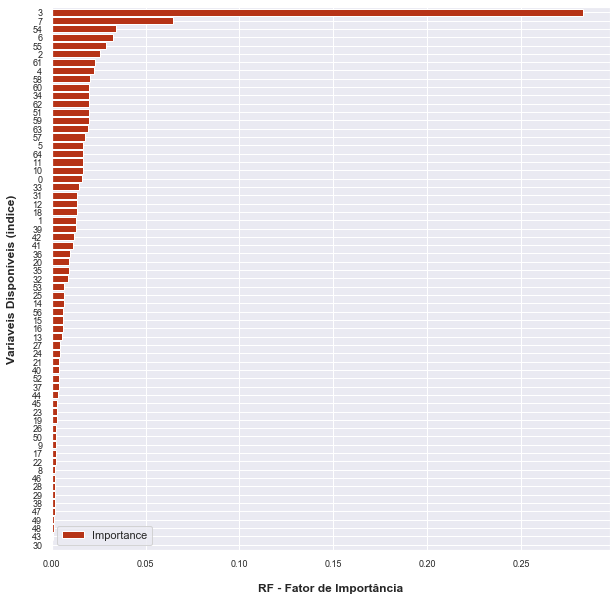

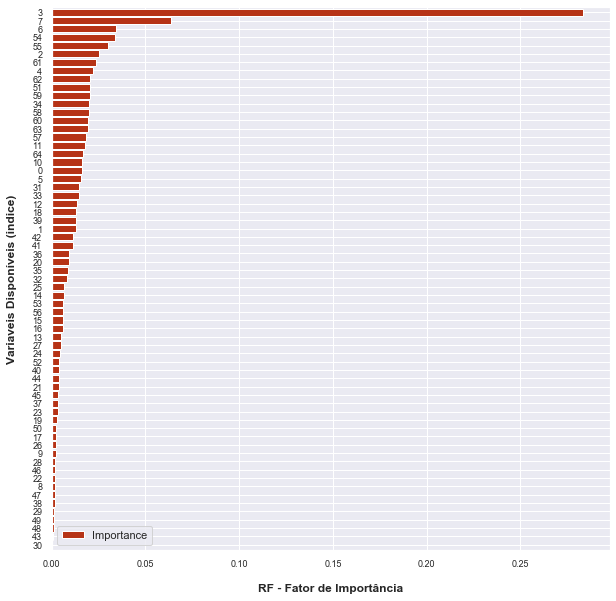

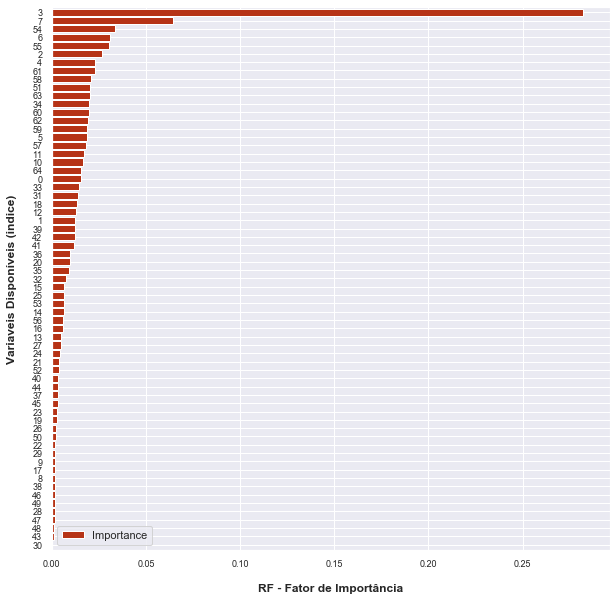

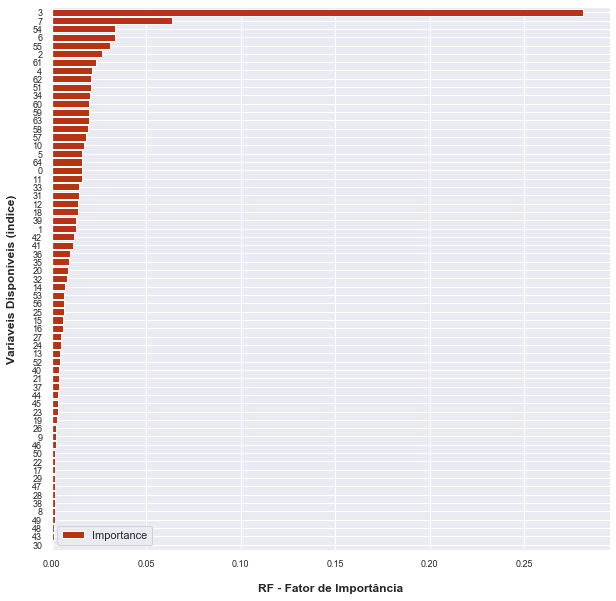

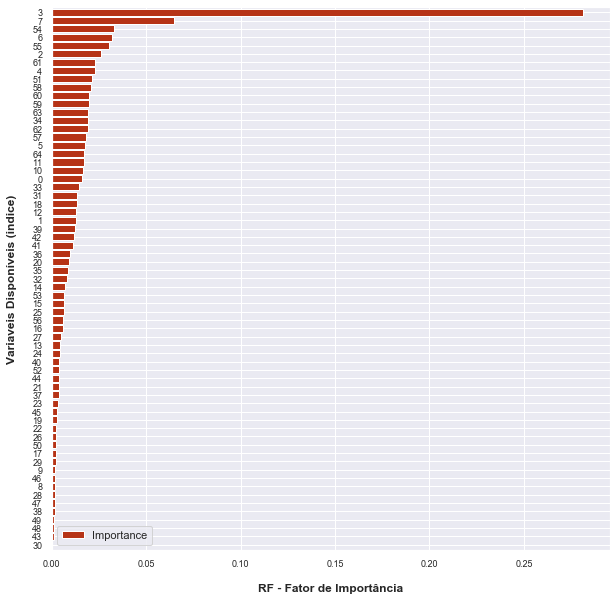

In [152]:
for df in df_rf:
    ax = df.plot(kind='barh', figsize=(10, 10), color='#B63316', zorder=2, width=0.85)
    ax.invert_yaxis()
    ax.set_xlabel("RF - Fator de Importância", labelpad=15, weight='bold', size=12)
    ax.set_ylabel("Variaveis Disponíveis (indice)", labelpad=15, weight='bold', size=12)
    ax.tick_params(labelsize=9)

#### XGBoost Classification Feature Importance

In [153]:
df_xgboost = df
model = XGBClassifier()
model.fit(X, y)
importance = model.feature_importances_
df_xgboost = pd.DataFrame({'Inputs': [i for i in range(len(importance))], 'Importance': importance})
df_xgboost = df_xgboost.set_index('Inputs')
df_xgboost = df_xgboost.sort_values(by='Importance', ascending= False)
df_xgboost[:]

[23:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Importance
Inputs,
3,0.083810
6,0.075721
7,0.065314
22,0.028050
49,0.027370
53,0.024534
5,0.024387
28,0.020848
0,0.020504


Text(0, 0.5, 'Variaveis Disponíveis (indice)')

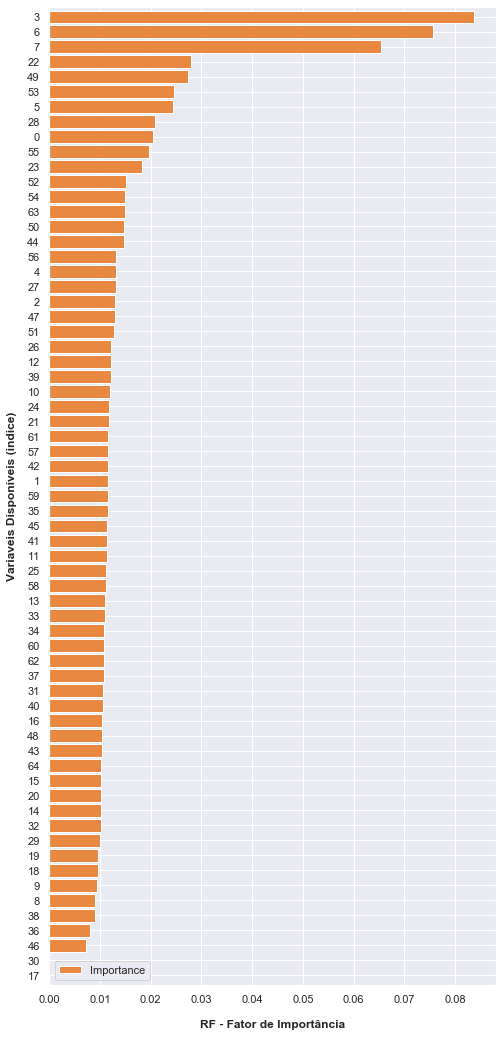

In [156]:
ax = df_xgboost.plot(kind='barh', figsize=(8, 18), color='#E98841', zorder=2, width=0.85)
ax.invert_yaxis()
ax.set_xlabel("RF - Fator de Importância", labelpad=15, weight='bold', size=12)
ax.set_ylabel("Variaveis Disponíveis (indice)", labelpad=10, weight='bold', size=12)


#### Permutation Feature Importance

In [155]:
df_pf = df
model = KNeighborsRegressor()
model.fit(X, y)
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
importance = results.importances_mean

df_pf = pd.DataFrame({'Inputs': [i for i in range(len(importance))], 'Importance': importance})
df_pf = df_pf.set_index('Inputs')
df_pf = df_pf.sort_values(by='Importance', ascending= False)
df_pf[:]

,Importance
Inputs,
3,1.156995e-01
10,5.191192e-02
4,3.192863e-02
11,2.941641e-02
2,8.618565e-03
7,4.122637e-03
5,3.556751e-03
6,1.925936e-04
63,1.523756e-04


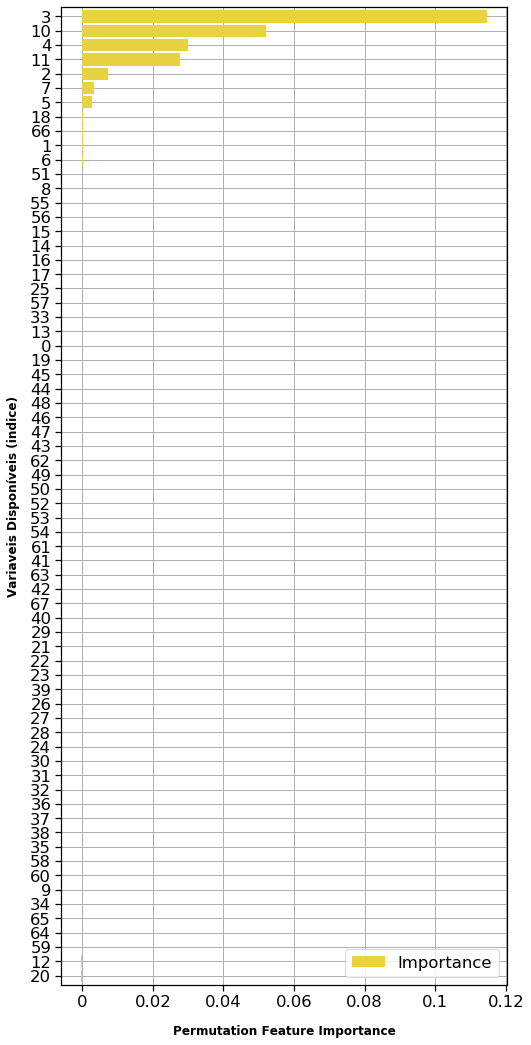

In [197]:
ax = df_pf.plot(kind='barh', figsize=(8, 18), color='#E9D241', zorder=2, width=0.85)
ax.invert_yaxis()
ax.set_xlabel("Permutation Feature Importance", labelpad=15, weight='bold', size=12)
ax.set_ylabel("Variaveis Disponíveis (indice)", labelpad=10, weight='bold', size=12)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
ax.grid()

#### Representação da Matriz de Correlação de Pearson

In [124]:
dataset_y1 = dataset_bruto[(dataset_bruto['y']==1)]
dataset_y1

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.006030,0.132353,0.139706,1
4,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.000000,0.455882,0.132353,1
11,18,39,1747,27314,801,1704,35,-999,1,63,22825,-999,1353,26,37,35,11,4,677,26,1409,5,3,2,3,7,0,24,4,1,0,10,5,0,435,2,3,0,4,1,5,23,4,1,0,0,0,0,0,0,0,42,1,1,0.208391,0.061,0.978495,0.015404,0.094288,-999.000000,0.129989,0.034083,0.895055,0.015649,-999.000000,-999.000000,0.250000,0.242647,1
14,21,121,812,31954,9574,2026,35,27,-999,-999,-999,-999,1387,13,-999,-999,-999,-999,1245,26,1685,5,3,0,2,-999,0,24,4,1,0,16,1,48,442,2,3,0,4,0,3,30,5,0,0,0,0,0,0,0,0,-999,0,0,0.203010,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.169461,0.065909,0.900101,0.016160,-999.000000,-999.000000,0.250000,0.231618,1
15,7,126,1446,31445,5691,2253,16,-999,1,63,27049,3003,260,10,71,72,28,5,196,10,1831,5,3,2,0,7,1,3,4,2,0,21,5,3,400,15,7,10,1,0,1,22,4,1,0,0,0,0,0,0,0,18,1,1,0.202450,0.154,0.833333,0.026590,0.087877,0.083077,0.132534,0.002890,0.919273,0.004765,-999.000000,-999.000000,0.235294,0.194853,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14080,19,39,1260,24416,3030,2435,35,-999,3,63,26783,2847,2007,26,7,9,9,4,814,26,2068,1,3,2,1,7,1,24,4,1,0,17,4,44,70,2,2,0,1,6,3,11,8,1,0,0,0,0,0,0,0,49,2,2,0.209005,0.225,0.451613,0.021096,0.024667,0.223968,0.198970,0.010728,0.963673,0.013745,-999.000000,-999.000000,0.264706,0.250000,1
14094,2,126,3437,28361,8085,2761,35,27,3,63,24166,4068,2007,26,13,11,11,4,1012,26,2255,5,3,2,1,7,1,24,4,1,0,17,2,5,346,21,0,9,1,11,8,24,11,1,0,0,0,0,0,0,0,37,2,2,0.212026,0.205,0.451613,0.026073,0.211489,0.537752,0.321195,0.130228,0.944501,0.106245,-999.000000,-999.000000,0.294118,0.216912,1
14099,22,92,2198,26648,2652,2453,35,-999,3,63,29592,2311,2033,26,2,2,2,2,1573,26,2093,3,3,0,4,7,1,24,4,2,0,10,4,28,568,0,25,0,4,9,3,25,5,1,4,2,2,1,1,0,0,41,2,2,0.211363,0.025,1.000000,0.017403,0.348089,0.202229,0.170415,0.046391,0.943491,0.041939,0.452245,0.005528,0.191176,0.198529,1
14101,4,126,2946,29089,3018,482,35,27,3,63,16793,2817,399,26,5,12,12,4,307,26,426,4,3,0,4,1,0,24,4,2,0,12,1,0,569,0,25,0,4,0,3,28,7,0,0,0,0,0,0,0,0,25,2,2,0.208477,0.590,0.101075,0.151210,0.267694,0.672057,0.207736,0.086144,0.894046,0.041939,-999.000000,-999.000000,0.426471,0.194853,1


In [108]:
dataset_y0 = dataset_bruto[(dataset_bruto['y']==0)]
dataset_y0

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
1,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.00000,-999.00000,0.147059,0.106618,0
2,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.00000,-999.00000,0.382353,0.242647,0
3,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.36337,0.00201,0.147059,0.132353,0
5,18,-999,-999,16114,208,-999,-999,-999,1,63,16938,7322,1247,2,58,58,22,5,943,2,1301,0,2,0,0,6,0,9,3,2,0,13,5,9,474,2,21,0,4,2,3,28,4,1,0,0,0,0,1,0,0,15,1,1,0.221367,0.497,0.101075,0.026035,-999.000000,0.057837,0.391608,0.080977,0.897074,0.019915,-999.00000,-999.00000,-999.000000,0.198529,0
6,5,89,1906,28845,9676,64,35,27,3,63,15320,3658,26,26,40,42,8,4,22,26,32,5,3,0,1,4,0,24,4,1,0,14,5,53,197,2,3,0,4,2,3,24,5,1,0,0,0,0,0,0,1,30,1,1,0.205834,0.014,1.000000,0.007534,0.141888,-999.000000,0.145790,0.035340,0.867810,0.014831,-999.00000,-999.00000,0.514706,0.224265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4,39,2511,28766,1109,2094,31,24,3,-999,5082,-999,1678,23,55,56,20,5,198,23,1739,5,4,2,1,7,0,26,5,1,0,17,5,12,314,0,1,0,4,2,3,23,5,1,0,0,0,0,0,0,0,25,2,2,0.227307,0.048,0.978495,0.063199,0.122448,-999.000000,0.069347,0.036178,0.869828,0.016160,-999.00000,-999.00000,0.455882,0.147059,0
14119,19,129,1114,-999,6376,-999,-999,27,-999,-999,-999,-999,1387,13,-999,-999,-999,-999,719,13,1445,5,1,1,2,-999,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,-999,0,0,0.210104,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.00000,-999.00000,0.147059,0.198529,0
14120,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0.217944,0.029,1.000000,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.00000,-999.00000,0.397059,0.158088,0
14121,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.00000,-999.00000,0.264706,0.128676,0
